In [ ]:
# primero nuestras librerias!

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [5]:
df = pd.read_csv("world_data_full_apply_nulos.csv", index_col=0)
df.head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe


1. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [14]:
df.groupby('continent')['country'].count()

continent
Africa             53
Asia               45
Central America    20
Europe             47
North America       2
Oceania            14
South America      13
Name: country, dtype: int64

<Axes: xlabel='count', ylabel='country'>

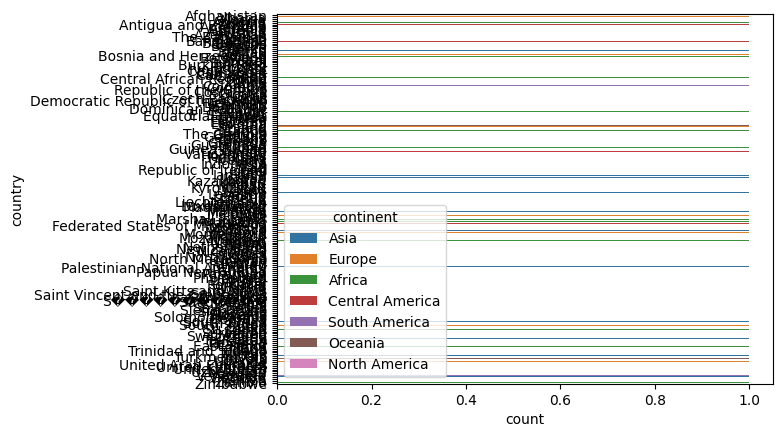

In [17]:
sns.countplot(data=df, y='country', hue='continent')
# asi no tiene sentido, no se entiende qué % es cada país

In [12]:
df_continente = df.groupby("continent")["country"].count().reset_index()
df_continente

,continent,country
0,Africa,53
1,Asia,45
2,Central America,20
3,Europe,47
4,North America,2
5,Oceania,14
6,South America,13


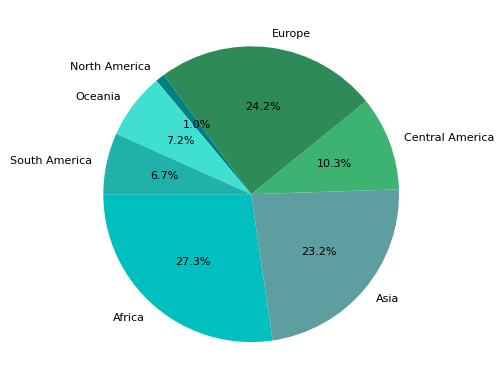

In [19]:
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie('country', labels= 'continent', data = df_continente, autopct=  '%1.1f%%', colors = colores, textprops={'fontsize': 8}, startangle=180);

2. ¿Cuáles son los 10 países con la mayor área forestal?

In [ ]:
df.head(2) # forested_area y country

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe


In [24]:
df['forested_area'].describe()

count    188.000000
mean      32.015426
std       23.791331
min        0.000000
25%       11.000000
50%       32.000000
75%       48.175000
max       98.300000
Name: forested_area, dtype: float64

In [ ]:
df_forestal_area = df.groupby('country').agg({'forested_area':'mean'})
df_forestal_area # lo hemos i8ntentado pero ver una variable (pais) con un solo dato (su sup forestal) no se puede asi 

,forested_area
country,
Afghanistan,2.1
Albania,28.1
Algeria,0.8
Andorra,34.0
Angola,46.3
...,...
Venezuela,52.7
Vietnam,48.1
Yemen,1.0


In [ ]:
df.groupby('country')['forested_area'].value_counts()

country      forested_area
Afghanistan  2.1              1
Albania      28.1             1
Algeria      0.8              1
Andorra      34.0             1
Angola       46.3             1
                             ..
Venezuela    52.7             1
Vietnam      48.1             1
Yemen        1.0              1
Zambia       65.2             1
Zimbabwe     35.5             1
Name: count, Length: 188, dtype: int64

<Axes: xlabel='country', ylabel='forested_area'>

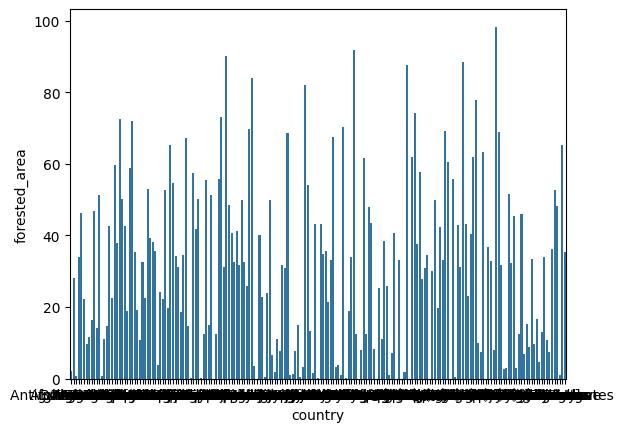

In [ ]:
sns.barplot(data=df, x='country', y='forested_area') # demasiados datos, necesitamos reducirlo a los 10 países con más bosques

In [42]:
top_10_forest = df.sort_values(by='forested_area', ascending=False).head(10)

In [43]:
top_10_forest

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
167,Suriname,4.0,SR,0.6,163.820,2.0,18.54,597.0,Paramaribo,1.738,294.66,22.0,SRD,2.42,98.3,1.29,3.985251e+09,108.8,12.6,16.9,Paramaribo,71.6,120.0,NaN,Dutch,10.1,1.21,581.372,51.1,19.5,27.9,7.33,384.258,3.919305,-56.027783,South America
111,Federated States of Micronesia,784.0,FM,31.4,702.000,NaN,22.82,691.0,Palikir,143.000,112.10,0.5,USD,3.05,91.9,NaN,4.019323e+08,97.2,14.1,25.6,Palikir,67.8,88.0,NaN,English,2.5,0.18,113.815,NaN,25.2,60.5,NaN,25.963,7.425554,150.550812,Oceania
61,Gabon,9.0,GA,20.0,267.667,7.0,31.61,241.0,Libreville,5.321,122.19,2.1,XAF,3.97,90.0,0.92,1.665796e+10,139.9,8.3,32.7,Libreville,66.2,252.0,1.46,French,25.9,0.68,NaN,52.9,10.2,47.1,20.00,NaN,-0.803689,11.609444,Africa
154,Seychelles,214.0,SC,3.4,455.000,0.0,17.10,248.0,"Victoria, Seychelles",605.000,129.96,1.8,SCR,2.41,88.4,NaN,1.698843e+09,100.4,17.1,12.4,"Victoria, Seychelles",72.8,53.0,2.00,French,2.5,0.95,97.625,NaN,34.1,30.1,NaN,55.762,-4.679574,55.491977,Africa
132,Palau,39.0,PW,10.9,459.000,NaN,14.00,680.0,Ngerulmud,224.000,118.17,1.3,USD,2.21,87.6,NaN,2.839949e+08,112.6,54.7,16.6,Koror,69.1,NaN,3.00,English,21.8,1.18,18.233,NaN,21.3,76.6,NaN,14.491,7.514980,134.582520,Oceania
71,Guyana,4.0,GY,8.6,214.969,3.0,19.97,592.0,"Georgetown, Guyana",2.384,116.19,2.1,GYD,2.46,83.9,0.90,4.280444e+09,97.8,11.6,25.1,"Georgetown, Guyana",69.8,169.0,0.98,English,40.5,0.80,782.766,56.2,NaN,30.6,11.85,208.912,4.860416,-58.930180,South America
92,Laos,32.0,LA,10.3,236.800,129.0,23.55,856.0,Vientiane,17.763,135.87,3.3,LAK,2.67,82.1,0.93,1.817384e+10,102.4,15.0,37.6,Vientiane,67.6,185.0,0.83,Lao,45.4,0.37,NaN,78.5,12.9,24.1,0.63,NaN,19.856270,102.495496,Asia
159,Solomon Islands,25.0,SB,3.9,28.896,NaN,32.44,677.0,Honiara,169.000,133.06,1.6,SBD,4.40,77.9,NaN,1.425074e+09,106.2,NaN,17.1,Honiara,72.8,104.0,0.40,English,3.3,0.19,669.823,83.8,29.5,32.0,0.58,162.164,-9.645710,160.156194,Oceania
135,Papua New Guinea,20.0,PG,2.6,462.840,4.0,27.07,675.0,Port Moresby,7.536,155.99,3.6,PGK,3.56,74.1,1.36,2.496961e+10,108.5,1.8,38.0,Port Moresby,64.3,145.0,1.16,Tok Pisin,5.8,0.07,NaN,47.2,13.6,37.1,2.46,NaN,-6.314993,143.955550,Oceania
59,Finland,18.0,FI,7.5,338.145,25.0,8.60,358.0,Helsinki,45.871,112.33,1.0,EUR,1.41,73.1,1.45,2.687612e+11,100.2,88.2,1.4,Helsinki,81.7,3.0,NaN,Swedish,19.9,3.81,NaN,59.1,20.8,36.6,6.59,NaN,61.924110,25.748151,Europe


<Axes: xlabel='forested_area', ylabel='country'>

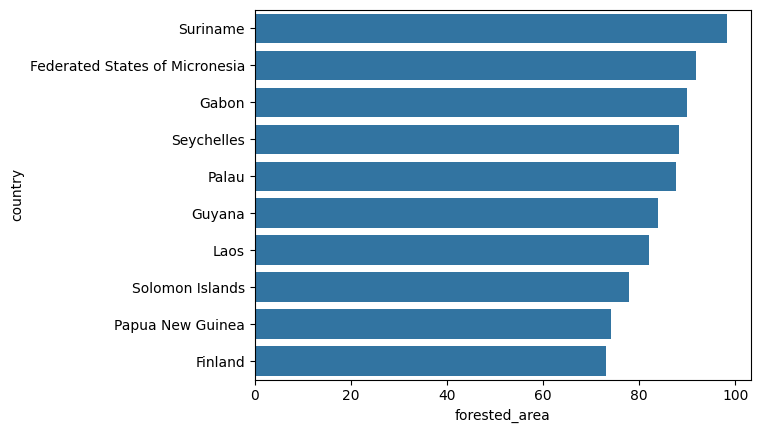

In [45]:
sns.barplot(data=top_10_forest, x='forested_area', y='country') 

3. ¿Cómo se distribuye la densidad de población entre los países?

In [ ]:
df.head(2) # 	density y country

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe


In [49]:
df['density'].describe()

count    195.000000
mean     134.504533
std      157.306774
min        1.265000
25%       26.168500
50%       83.000000
75%      165.500000
max      847.000000
Name: density, dtype: float64

<Axes: xlabel='density', ylabel='country'>

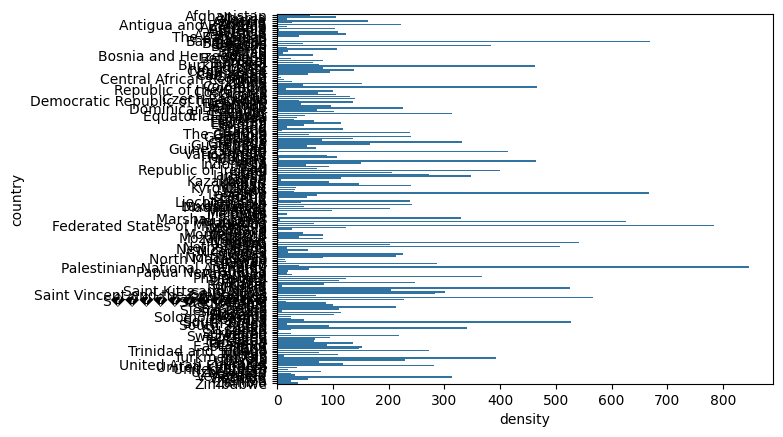

In [47]:
sns.barplot(data=df, x='density', y='country') 

<Axes: xlabel='density', ylabel='country'>

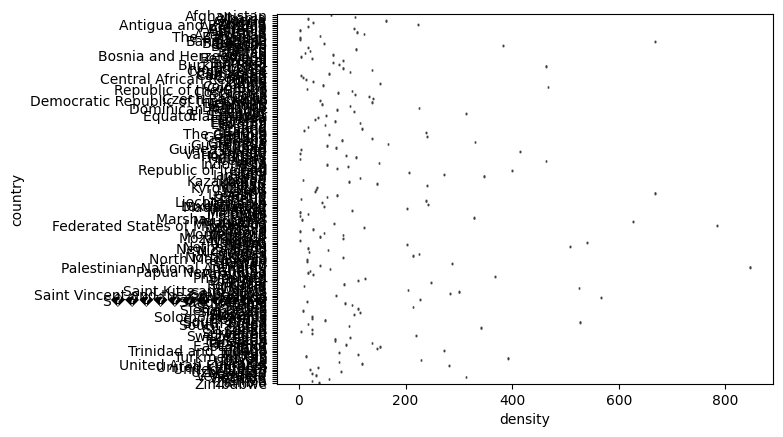

In [48]:
sns.boxplot(data=df, x='density', y='country')

<Axes: xlabel='density'>

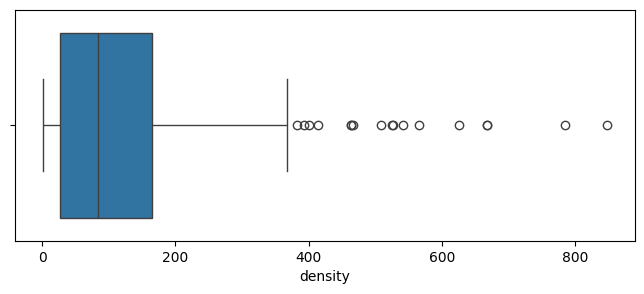

In [50]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['density'].dropna())

Cómo plantear la visualización:
- Histograma
- Countplot
- Boxplot
- Scatterplot 
- Barplot

Una Variable numérica: histograma y boxplot

Dos Variables numéricas: scatterplot (y regplot)
* se le puede añadir una variable categórica con un hue para ver más

Una Variable numérica y otra categórica: 
- barplot de la categórica y media de la numérica
- boxplot de la numérica con la categórica en el hue

Una Variable categórica: countplot (= value_counts), pieplot(xa pocas categorías y cuando los % están bien diferenciados)

Dos Variables categóricas: tablas de contingencia
